## 부동산 회사 실제 프로젝트
1.  큰 그림을 본다.
    1. 문제 정의
        - 비즈니스의 목적을 정확히 확인 : 파이프라인
             - *파이프라인 : 데이터 처리 컴포넌트들이 연속되어 있는 것. 각 컴포넌트들은 비동기적으로 동작
        - 현재 솔루션 구성 확인 : 해결 방법에 대한 정보 & 참고 성능으로 사용 가능
        
        - 현재 문제 : 지도학습, 다중회귀, 단변량 회귀, 배치 학습
    1. 성능 측정 지표 선택
        - RMSE : 평균 제곱근 오차(l2, 유클리디안 놈)
        - MAE : 평균 절대 오차(l1, 맨해든 놈)
        - RMSE는 작은 값 보다는 큰 값의 원소에 크게 영향을 받기 때문에, 이상치에 더 민감. 따라서 이상치가 많으면 MAE를, 이상치가 드물면 RMSE를 쓰는 것이 적절
    1. 가정 검사
    

### 데이터 가져오기

In [141]:
import os
import tarfile
import urllib
import requests

download_root = "https://github.com/rickiepark/handson-ml2/raw/master/"
Housing_path = os.path.join("datasets","housing") # 단순히 주소 경로를 간편하기 쓰기 위한 함수
Housing_url = download_root + "datasets/housing/housing.csv"

# 리눅스 버전
def linux_fetch_housing_data(housing_url = download_root + "datasets/housing/housing.tgz", housing_path = Housing_path):
    os.makedirs(housing_path, exist_ok=True) # 디렉토리 만들기
    tgz_path = os.path.join(housing_path, "housing.tgz") 
    # 해당 데이터(housing_url)을 tgz_path 경로, 파일명(tgz_path)으로 저장.
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path) # 압축파일 열기
    housing_tgz.extractall(path=housing_path) # 압축파일 풀기
    housing_tgz.close()

# 윈도우 버전
def fetch_housing_data(housing_url = Housing_url, housing_path = Housing_path):
    os.makedirs(housing_path, exist_ok = True)
    csv_path = os.path.join(housing_path, "housing.csv")
    urllib.request.urlretrieve(housing_url, csv_path)
    

In [142]:
import pandas as pd

def load_housing_data(housing_path = Housing_path):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [143]:
fetch_housing_data() # 데이터 다운로드
housing = load_housing_data() # 데이터 로드

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

### 데이터 구조 훑어보기

In [144]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [145]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [146]:
# 텍스트 칼럼인 ocean_proximity 열 확인
housing["ocean_proximity"].value_counts()
# 범주형인 것을 확인

<1H OCEAN     7276
INLAND        5263
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: ocean_proximity, dtype: int64

In [147]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100


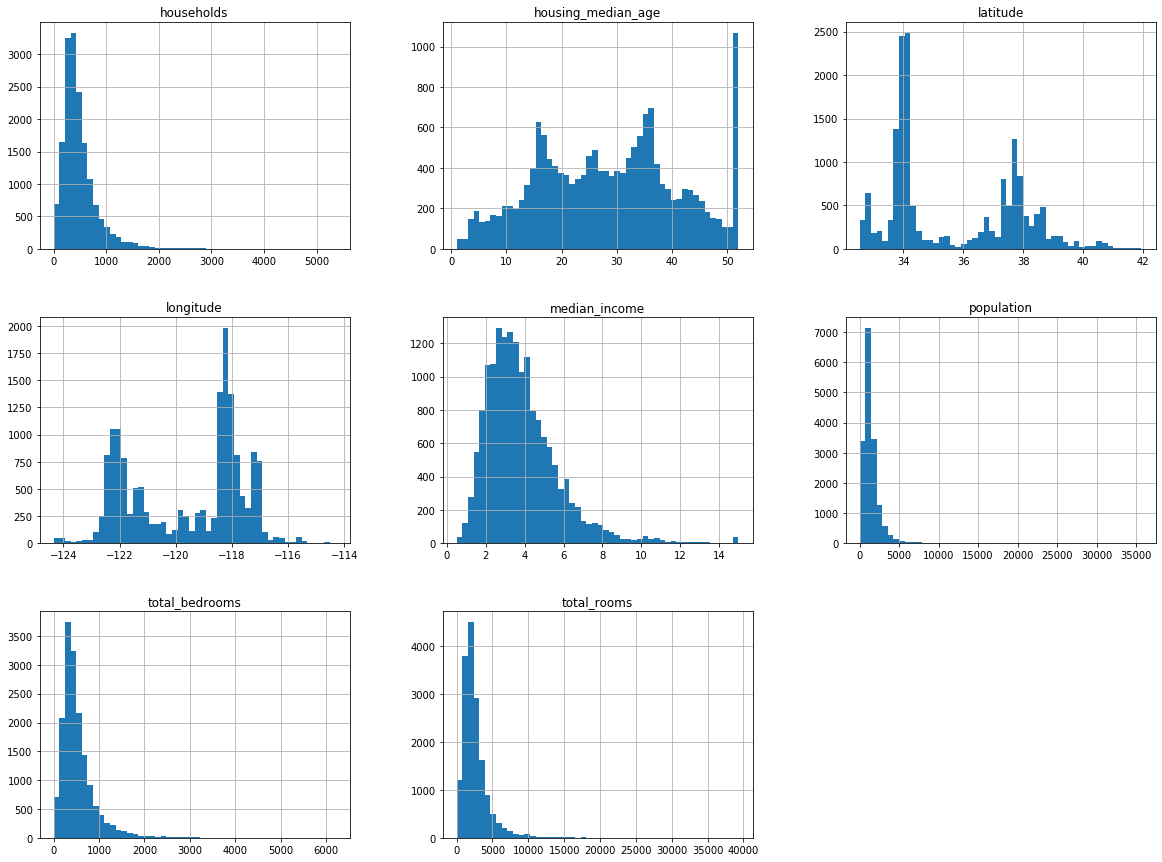

In [148]:
# 화면에 그래프를 그리기 위해서는 사용자 컴퓨터의 그래픽 백엔드를 필요로 함. 주피터 자체의 백엔드를 사용하도록 설정하기 위한 명령어
%matplotlib inline 
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize = (20,15)) # 50개 구간으로
plt.show()

**히스토그램에서 확인할 수 있는 사항**
1. 중간 소득(median_income)의 스케일이 조정, 상한 하한 존재 -> 어떻게 전처리 되어있는지를 반드시 이해하는 것이 필요
1. 중간 주택 연도(housing median age)와 중간 주택 가격(median house value)의 상한 존재
    - 오른쪽에서 그래프가 심하게 높아지면서 끝나는 것을 보았을 때 상한 짐작 가능
    - 변수로 들어갈 경우에도 만약 실제론 값이 달라짐에 따라 많은 영향이 있다면 정확도가 낮아짐
    - value는 타겟값이기 때문에 value가 한계값을 넘어가지 않도록 학습되고, 예측할 수 있음.
        - 만약 한계값을 넘어서는 정확한 예측값이 필요하다면:
            1. 한계값 밖의 구역에 대한 정확한 레이블을 구함
            1. 훈련 세트에서 이런 구역 제거
1. 특성들의 스케일이 서로 많이 다름
1. 히스토그램이 정규분포의 모양을 띄지 않고 꼬리가 두꺼움

### 테스트 세트 만들기
- 데이터를 자세히 살펴보기 이전에 테스트 세트를 떼어놓는 것이 좋음
- 테스트 세트의 패턴에 속아 일반화된 모델을 만들지 못하는 **데이터 스누핑 편향**이 생길 가능성이 높기 때문.
- 일반적으로 2~30%, 데이터가 더 많으면 그보다 더 적게
- **무작위 샘플링 방식** : 데이터셋이 충분히 크다면(특히 특성 수에 비해) 괜찮
- **계층적 샘플링 방식** : 전체를 대표할 수 있는 적절한 표본을 산출하기 위해 전체적인 계층의 비율과 동일하게 표본의 계층의 비율을 추출함으로써 표본의 편향성을 줄이고, 대표성을 높임
    - 만약 계층을 만드는 상황이라면 계층별로 데이터셋에 충분한 샘플 수가 있어야 함. 즉 너무 많은 계층으로 나누면 안되고, 각 계층이 충분히 커야함.

#### 무작위 샘플링

In [149]:
import numpy as np
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data)) # 0~수-1 까지의 수를 랜덤으로 배치한 배열 생성
    # ex) np.random.permutaion(5) -> 0, 4, 1, 2, 3
    test_set_size = int(len(data) * test_ratio) # test set 개수
    test_indices = shuffled_indices[:test_set_size] # test set index
    train_indices = shuffled_indices[test_set_size:] # train set index
    return data.iloc[train_indices], data.iloc[test_indices]

In [150]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), len(test_set))

13210 3302


다음 번 실행시, 테스트 세트가 변하는 상황 발생 -> 모든 데이터를 살펴보게 되는 문제 발생
- 해결할 수 있는 방법
    - 테스트 세트를 따로 저장
    - 같은 난수 인덱스가 생성될 수 있도록 함 
but, 둘 방법 모두 데이터가 업데이트되게 되면 문제가 됨!
- 샘플의 식별자를 사용
    - 행의 index를 식별자로 할 때에는 새로운 데이터는 기존 데이터의 끝에 추가되어야 하고, 어떤 행도 삭제되어선 안됨
    - 구역의 위경도 또한 index로 사용 가능

In [151]:
from zlib import crc32
# crc32 : crc 방식 중 하나로, crc란 네트워크 등을 통하여 데이터를 전송할 때 전송된 데이터에 오류가 있는지를 확인하기 위한 체크값
# 전송 전과 전송 후의 데이터의 crc가 같다면 파일의 오류 x, 다르다면 오류 o
def test_set_check(identifier, test_ratio):
    # 전부 2**32보단 작은데 거기서 원하는 test 비율을 곱하게 되면 그 비율 만큼의 index가 더 작은 값을 가짐
    return crc32(np.int64(identifier)) & 0xfffcffaf < test_ratio * 2**32

In [152]:
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column] 
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [153]:
# 인덱스를 사용하여 분리
housing_with_id = housing.reset_index() # index 열이 추가된 데이터 반환
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

# 위경도를 사용하여 분리
housing_with_id["id"] = housing["longitude"]*1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

# sklearn 사용 분리 -> split_train_test와 비슷하고, random_state로 random seed 값 설정 가능
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing,test_size=0.2, random_state= 42)

ValueError: cannot convert float NaN to integer

In [ ]:
test_set

#### 계층 샘플링

In [ ]:
# 대부분 1.5에서 6에 몰려있고, 일부 1.5보다 작고, 일부 6보다 큼
housing["income_cat"] = pd.cut(housing["median_income"],
                              bins=[0., 1.5, 3.0, 4.5, 6., np.inf], # 숫자형일 경우 구간 수
                              labels=[1,2,3,4,5])


In [ ]:
housing["income_cat"].hist()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit # 계층 샘플링

# n_splits으로 몇번 나눌 것인지 조정할 수 있음.(test set 중복되지 않게 나누어줌)
split = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state=42)

# for문으로 index 반환 가능
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [ ]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

In [ ]:
# income_cat 칼럼 삭제를 통해 데이터를 원래 상태로 되돌림
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1,inplace=True)

### 데이터 이해를 위한 탐색과 시각화

In [ ]:
housing = strat_train_set.copy()

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
# alpha 는 투명도로써, 투명도를 넣어주게 되면 데이터 포인트가 밀집된 영역을 더 잘 보여줌

In [ ]:
# 산점도, size는 인구에 따라, label명 : population, color는 house value에 따라, color map은 jet꺼로
housing.plot(kind="scatter",x="longitude",y="latitude", alpha=0.4,
            s=housing["population"]/100, label = "population",
            figsize=(10,7), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)

plt.legend()

### 상관관계 조사
- 표준 상관계수 : 두 데이터간의 선형적인 상관성을 살펴볼 수 있음
    - 오직 선형적인 상관관계만 측정하고, 비선형적인 상관계수는 측정하지 못함
    - 비선형적인 관계가 있음에도 상관계수는 0으로 나올 수 있음
    - 범위 : -1~1
    - 1이면 양의 선형관계, -1이면 음의 상관관계
    - 상관계수는 기울기와는 상관없음.
![상관계수](https://camo.githubusercontent.com/f539b33f587d31ba0c29fc9224f08421498d939d/68747470733a2f2f75706c6f61642e77696b696d656469612e6f72672f77696b6970656469612f636f6d6d6f6e732f642f64342f436f7272656c6174696f6e5f6578616d706c6573322e737667)

In [ ]:
from pandas.plotting import scatter_matrix # 숫자형 특성 사이에 산점도를 그려주는 판다스 함수

attributes = ["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))
# 대각선 방향은 각 변수 자신에 대한 것이기 때문에 그냥 직선, 따라서 각 특성의 히스토그램을 그려줌

In [ ]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1)

# 상관관계가 높은 것을 볼 수 있음. 하지만 50000, 45000, 28000 근처에서 직선의 형태가 나타남 -> 이상한 데이터임으로 제거해주는 것이 필요

In [ ]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [ ]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

# 빠른 프로토 타입을 만들어 계속 반복적인 프로세스를 진행하는 것이 중요

### 머신러닝 알고리즘을 위한 데이터 준비
- 함수를 만들어 자동화 함
    - 어떤 데이터셋에 대해서도 데이터 변환을 손쉽게 반복할 수 있음
    - 향후 프로젝트에 사용할 수 있는 변환 라이브러리를 점진적으로 구축
    - 실제 시스템에서 알고리즘에 새 데이터를 주입하기 전에 변환시키는 데 이 함수를 사용할 수 있음
    - 여러가지 데이터 변환을 쉽게 시도할 수 있고, 어떤 조합이 가장 좋은지 확인하는데에 편리
- 결측값 관련 방법
    - 해당 구역 제거
    - 전체 특성 삭제
    - 0 or 평균값 or 중간값 등으로 채움
- 범주형 칼럼 전처리
    - 라벨링
        - 머신러닝이 가까운 수를 관련 있는 것으로 오해할 여지가 있음
    - 원핫
        - 너무 많은 카테고리가 있다면 훈련을 느리게하고 성능을 저하시킬 우려가 있음.
        - 범주형 입력값을 숫자형 특성으로 바꿈(국가 이름 -> 1인당 gdp/국가인구)
        - 임베딩(표현 학습의 한 예)를 통해 저차원으로 바꿀 수 있음

In [ ]:
housing = strat_train_set.drop("median_house_value", axis=1) # 예측변수와 타켓값 분리
housing_labels = strat_train_set["median_house_value"].copy()

In [ ]:
# 판다스 함수를 이용한 결측값 처리
housing.dropna(subset=["total_bedrooms"], axis=0) # 결측이 있는 행 제거
housing.dropna(subset=["total_bedrooms"], axis=1) # 결측이 있는 특성 제거
# 결측값을 중앙값으로 채움
median = housing["total_bedrooms"].median()
# 중앙값으로 채울 때 후에 data가 업데이트 될 때 해당 중앙값을 업데이트된 중앙값으로 채워주어야 하기 때문에
# 중앙값을 저장해놓는 것이 필요
housing["total_bedrooms"].fillna(median, inplace=True)

In [ ]:
# 사이킷런을 이용한 결측값 처리
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1) # 수치형 특성에만 적용되기 때문에 텍스트 특성 삭제

imputer.fit(housing_num)
imputer.statistics_ # 나중에 데이터가 어떤 특성에서 결측이 발생할지 알 수 없기 때문에 모든 특성에 적용
housing_num.median().values # 이것으로도 중앙값을 구할 수 있음

X = imputer.transform(housing_num) 

# 다시 데이터 프레임 형식으로 변환
housing_tr = pd.DataFrame(X, columns = housing_num.columns, index=housing_num.index)

In [ ]:
housing_tr

In [154]:
# 범주형 특성 다루기
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [156]:
# 카테고리 인코딩
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat) # fit 과 transform 을 동시에 해줌

In [157]:
housing_cat_encoded

array([[0.],
       [0.],
       [4.],
       ...,
       [1.],
       [0.],
       [3.]])

In [158]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [159]:
# 원핫 인코딩
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot # 메모리적인 효율성을 위해서 1인 원소의 위치만 저장해 놓는 사이파이 희소행렬

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [161]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [190]:
# 나만의 변환기
from sklearn.base import BaseEstimator, TransformerMixin
# 사이키럿의 두 함수 상속
# BaseEstimator은 get_params()와 set_params() 가지고 있고, *args, **kargs 사용 불가
# TransformerMixin은 fit_transform()을 가지고 있음

rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6

class CombineAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        # 이 하이퍼파라미터를 통해 알고리즘에 도움이 되는지 안되는지 쉽게 확인 가능
        # 100% 확신이 없는 모든 것에 대해 가능, 더 많은 조합을 시도할 수 있음
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self,X,y=None):
        return self # 아무 일도 하지 않음
    
    def transform(self,X):
        rooms_per_household = X[:, rooms_ix] / X[:,households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                        bedrooms_per_room] # 열방향으로 이어붙여줌
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombineAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

### 특성 스케일링
- 트리기반 알고리즘을 제외하고는 입력 숫자 특성들의 스케일이 많이 다르면 잘 작동하지 않음
- 정규화
    - min-max 스케일링 : 데이터의 최댓값에서 데이터의 최솟값을 뺀 값으로 값들을 나눔으로써 0~1 범위에 들도록 값을 이동
    - 표준화 : 평균이 0, 분산이 1이 되도록 만들어줌, 상한과 하한이 없어 문제가 될 수 있지만 이상치에 덜 민감
    

In [191]:
# pipeline 만들기
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# 이름/추정기 쌍의 목록을 입력으로 받음
# 마지막단계는 변환기와 추정기 모두 사용 가능, 그 외에는 모두 변환기 이어야함
num_pipeline = Pipeline([
    ("inputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombineAttributesAdder()),
    ("std_scaler", StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [194]:
# 각 열마다 다른 전처리를 적용할 수 있는 변환기 만들기
from sklearn.compose import ColumnTransformer
# 이름/변환기/변환기가 적용될 열 이름
# 삭제하고 싶은 열 : drop
# 아무것도 하고싶지 않은 열 : passthrough
# 아무것도 지정되지 않은 열 : 삭제됨
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

# Columntransfomer에서는 반환값에 희소행렬과 밀집행렬이 섞여있다면, 임계값보다 낮지 않은 이상 밀집 행렬 반환.
full_pipeline = ColumnTransformer([("num", num_pipeline, num_attribs),
                                  ("cat", OneHotEncoder(), cat_attribs),
                                  ])


### 모델 선택과 훈련

In [206]:
housing_prepared = full_pipeline.fit_transform(housing)

In [207]:
# Linear 모델
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [209]:
some_data_prepared = housing_prepared[:5]
print("예측", lin_reg.predict(some_data_prepared))
print("레이블", housing_labels[:5])

예측 [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
레이블 17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
Name: median_house_value, dtype: float64


In [211]:
from sklearn.metrics import mean_squared_error # MSE
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse) # RMSE
lin_rmse # 과소적합

68628.19819848923

In [212]:
# Tree Model(비선형 관계 또한 찾을 수 있음)
from sklearn.tree import DecisionTreeRegressor

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)
DecisionTreeRegressor(random_state=42)

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse # 과대적합

0.0

### 교차 검증을 사용한 평가
- 여러 종류의 모델을 사용하여 가능성 있는 2~5개의 정도의 모델을 정한후, 하이퍼파라미터 조정에 들어가는 것이 좋음
- 이때, 예측값, 교차검증 점수, 파라미터, 하이퍼파라미터 모두를 저장해야함

In [221]:
# 저장 방법
import joblib
joblib.dump(my_model, "my_model.pkl")

my_model_loaded = joblib.load("my_model.pkl")

NameError: name 'my_model' is not defined

In [213]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [215]:
def display_scores(scores):
    print("점수:", scores)
    print("평균:", scores.mean())
    print("표준 편차:", scores.std())

display_scores(tree_rmse_scores)

점수: [70194.33680785 66855.16363941 72432.58244769 70758.73896782
 71115.88230639 75585.14172901 70262.86139133 70273.6325285
 75366.87952553 71231.65726027]
평균: 71407.68766037929
표준 편차: 2439.4345041191004


In [216]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

점수: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
평균: 69052.46136345083
표준 편차: 2731.674001798349


In [218]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [219]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

점수: [49519.80364233 47461.9115823  50029.02762854 52325.28068953
 49308.39426421 53446.37892622 48634.8036574  47585.73832311
 53490.10699751 50021.5852922 ]
평균: 50182.303100336096
표준 편차: 2097.0810550985693


In [220]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     69052.461363
std       2879.437224
min      64969.630564
25%      67136.363758
50%      68156.372635
75%      70982.369487
max      74739.570526
dtype: float64

In [ ]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

### 모델 튜닝
- 그리드 탐색 방법 : 하이퍼 파라미터의 탐색 공간이 작은 경우
- 랜덤 탐색 : 하이퍼 파라미터의 탐색 공간이 큰 경우
    - 지정된 횟수를 입력하면 하이퍼파라미터에 임의의 수(각기 다른)를 대입하여 평가.

In [222]:
from sklearn.model_selection import GridSearchCV
# GridSearchCV의 refit=True(디폴트값)은 교차 검증으로 최적의 추정기를 찾은 다음, 전체 훈련 세트로 다시 훈련시켜놓음
# 첫번쨰 딕셔너리 이후 두번째 딕셔너리 시도
param_grid = [
    # 12(=3×4)개의 하이퍼파라미터 조합을 시도
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # bootstrap은 False로 하고 6(=2×3)개의 조합을 시도
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [223]:
grid_search.best_params_ # 최적의 파라미터

{'max_features': 8, 'n_estimators': 30}

In [224]:
grid_search.best_estimator_ # 최적의 모델
# refit=True라면 모든 grid search 이후 이 모델로 전체 데이터를 학습 시킴

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [225]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63669.11631261028 {'max_features': 2, 'n_estimators': 3}
55627.099719926795 {'max_features': 2, 'n_estimators': 10}
53384.57275149205 {'max_features': 2, 'n_estimators': 30}
60965.950449450494 {'max_features': 4, 'n_estimators': 3}
52741.04704299915 {'max_features': 4, 'n_estimators': 10}
50377.40461678399 {'max_features': 4, 'n_estimators': 30}
58663.93866579625 {'max_features': 6, 'n_estimators': 3}
52006.19873526564 {'max_features': 6, 'n_estimators': 10}
50146.51167415009 {'max_features': 6, 'n_estimators': 30}
57869.25276169646 {'max_features': 8, 'n_estimators': 3}
51711.127883959234 {'max_features': 8, 'n_estimators': 10}
49682.273345071546 {'max_features': 8, 'n_estimators': 30}
62895.06951262424 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54658.176157539405 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59470.40652318466 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52724.9822587892 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [226]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [227]:
feature_importances

array([7.33442355e-02, 6.29090705e-02, 4.11437985e-02, 1.46726854e-02,
       1.41064835e-02, 1.48742809e-02, 1.42575993e-02, 3.66158981e-01,
       5.64191792e-02, 1.08792957e-01, 5.33510773e-02, 1.03114883e-02,
       1.64780994e-01, 6.02803867e-05, 1.96041560e-03, 2.85647464e-03])

In [229]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.36615898061813423, 'median_income'),
 (0.16478099356159054, 'INLAND'),
 (0.10879295677551575, 'pop_per_hhold'),
 (0.07334423551601243, 'longitude'),
 (0.06290907048262032, 'latitude'),
 (0.056419179181954014, 'rooms_per_hhold'),
 (0.053351077347675815, 'bedrooms_per_room'),
 (0.04114379847872964, 'housing_median_age'),
 (0.014874280890402769, 'population'),
 (0.014672685420543239, 'total_rooms'),
 (0.014257599323407808, 'households'),
 (0.014106483453584104, 'total_bedrooms'),
 (0.010311488326303788, '<1H OCEAN'),
 (0.0028564746373201584, 'NEAR OCEAN'),
 (0.0019604155994780706, 'NEAR BAY'),
 (6.0280386727366e-05, 'ISLAND')]

In [231]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [232]:
final_rmse

47730.22690385927

In [233]:
# 신뢰구간 구하기
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([45685.10470776, 49691.25001878])